In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, auc, roc_curve, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

In [2]:
df = pd.read_csv('../data/creditcard.csv')

In [3]:
scaler = MinMaxScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

df = df.drop(['Time'], axis=1)

In [4]:
# 'Class' is target variable
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
print(y_train.value_counts(normalize=True))

Class
0    0.998222
1    0.001778
Name: proportion, dtype: float64


In [6]:
# initialize random forest
rf_clf = RandomForestClassifier(random_state=1)

In [7]:
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

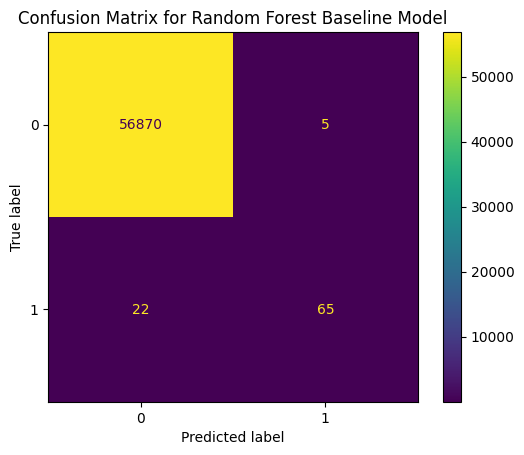

In [8]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest Baseline Model')
plt.show()

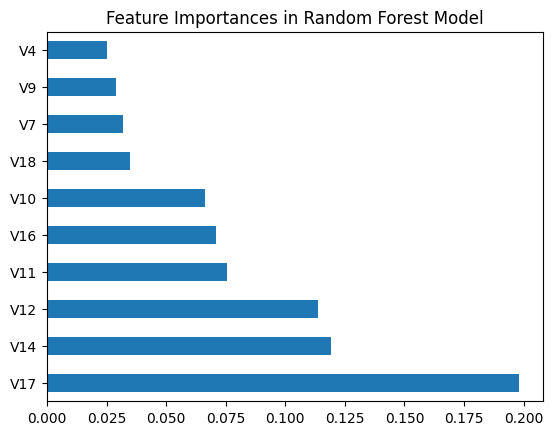

In [9]:
feature_importances_rf = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances_rf.nlargest(10).plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [10]:
# ROC curve 
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

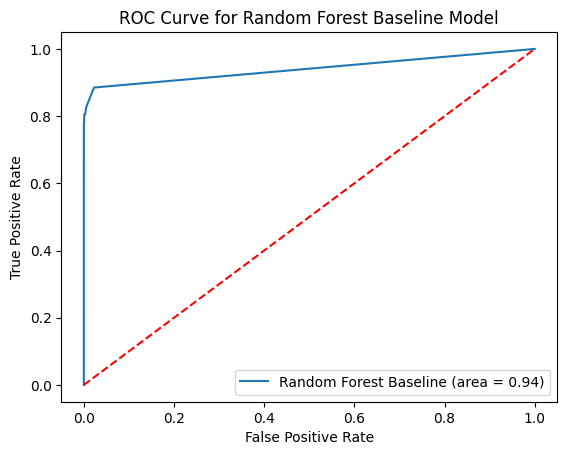

In [11]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Baseline (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Baseline Model')
plt.legend(loc="lower right")
plt.show()

In [12]:
# baseline evaluation
print("Random Forest - Baseline Model Performance")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.2f}")

Random Forest - Baseline Model Performance
Precision: 0.93
Recall: 0.75
F1-Score: 0.83
ROC AUC: 0.94


In [13]:

param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier()

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=5,  
    cv=3,       
    verbose=10, 
    random_state=1,  
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [14]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Model Performance with Best Parameters")
print(f"Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_best):.2f}")




Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Best Score: 0.9995040488243524

Random Forest Model Performance with Best Parameters
Precision: 0.93
Recall: 0.76
F1-Score: 0.84
ROC AUC: 0.95


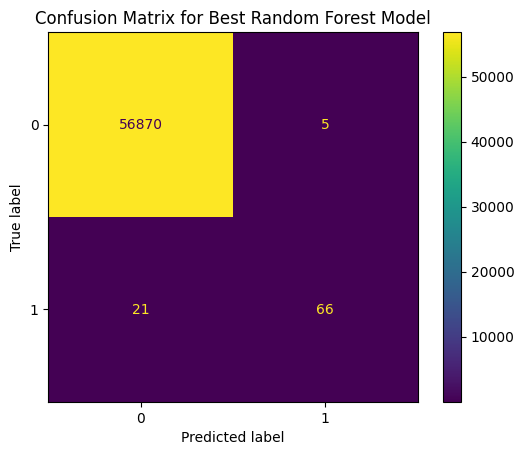

In [15]:
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot()
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()



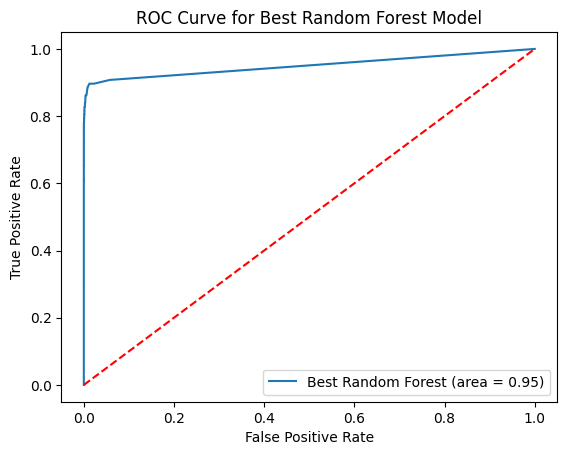

In [16]:
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, label=f'Best Random Forest (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc="lower right")
plt.show()

Classification Report for Random Forest Baseline Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.75      0.83        87

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Classification Report for Random Forest Model with Best Parameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.76      0.84        87

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest - Baseline vs Best Model Performance
--------------------------------------------------
Baseline Model Performance:
Precision: 0.93
Recall: 0.75
F1-Score: 0.83
ROC AUC: 0.94

Best Model Performance after Para

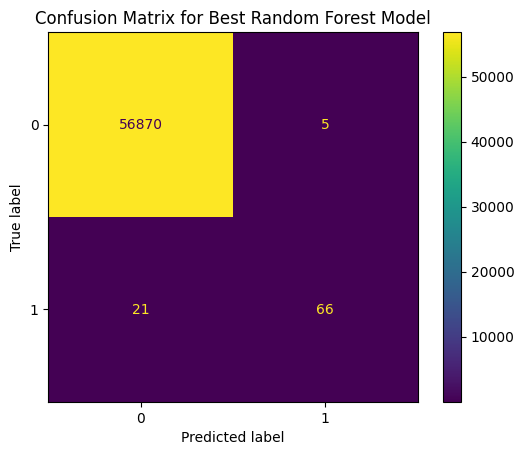

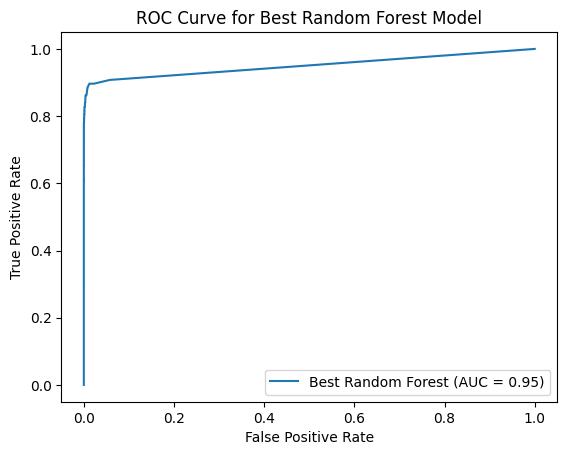

In [17]:
from sklearn.metrics import classification_report

# Classification report for the baseline Random Forest model
print("Classification Report for Random Forest Baseline Model:")
print(classification_report(y_test, y_pred_rf))

# Classification report for the Random Forest model with best parameters
print("Classification Report for Random Forest Model with Best Parameters:")
print(classification_report(y_test, y_pred_best))

# Summarize the key metrics for baseline and best models
print("Random Forest - Baseline vs Best Model Performance")
print("--------------------------------------------------")
print("Baseline Model Performance:")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.2f}")

print("\nBest Model Performance after Parameter Tuning:")
print(f"Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_best):.2f}")

# Confusion Matrix and ROC Curve for Best Random Forest Model
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot()
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, label=f'Best Random Forest (AUC = {roc_auc_best:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc="lower right")
plt.show()


Classification Report for Random Forest Baseline Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.75      0.83        87

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Classification Report for Random Forest Model with Best Parameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.76      0.84        87

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest - Baseline vs Best Model Performance
--------------------------------------------------
Baseline Model Performance:
Precision: 0.93
Recall: 0.75
F1-Score: 0.83
ROC AUC: 0.94

Best Model Performance after Parameter Tuning:
Precision: 0.93
Recall: 0.76
F1-Score: 0.84
ROC AUC: 0.95